In [2]:
import os
import folium
import json
import pandas as pd
from branca.colormap import linear
import numpy as np
from shapely.geometry import Polygon
from shapely.geometry import Point
from numpy import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
from folium import plugins

In [3]:
# read the data to a dataframe
uber_wait_time = pd.read_csv('aggr-avg-wait-time.csv')

#data2017.head()
uber_wait_time.head()

,Neighborhood,Lat,Long,D20171019-P1,D20171019-P2,D20171019-P3,D20171019-P4,D20171020-P1,D20171020-P2,D20171020-P3,...,D20171030-P4,D20171031-P1,D20171031-P2,D20171031-P3,D20171031-P4,D20171101-P1,D20171101-P2,D20171101-P3,D20171101-P4,Total_Avg_Wait_Time
0,Alecrim,-5.796972,-35.219023,320.4,162.86,210.51,287.21,339.0,193.0,222.00,...,276.67,391.67,197.40,239.04,297.83,476.25,195.56,282.47,344.10,272.06
1,Areia Preta,-5.787506,-35.190106,295.2,157.50,193.22,241.97,350.0,168.0,188.85,...,257.92,475.42,194.89,215.04,296.52,513.75,207.56,275.73,308.72,260.96
2,Barro Vermelho,-5.798520,-35.208670,292.8,146.79,181.03,276.39,323.0,180.0,213.00,...,276.25,374.17,162.60,228.87,304.75,417.08,180.44,260.22,311.28,249.53
3,Bom Pastor,-5.808842,-35.245977,331.2,287.14,247.12,297.05,359.0,291.0,268.00,...,324.58,455.42,287.73,280.80,310.00,462.50,322.67,317.53,361.54,318.18
4,Candelária,-5.844989,-35.221428,309.6,210.00,213.56,250.82,342.0,266.0,220.68,...,295.83,384.58,234.05,242.90,268.06,443.75,281.78,298.65,354.87,279.04


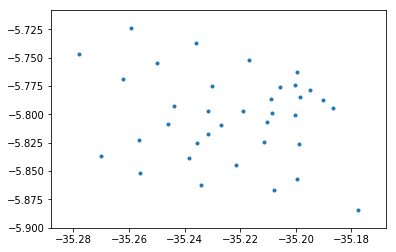

In [4]:
plt.scatter(uber_wait_time['Long'], uber_wait_time['Lat'], marker='.')

In [7]:
import mplleaflet
plt.scatter(uber_wait_time['Long'], uber_wait_time['Lat'], marker='.')
mplleaflet.display()

In [8]:
# import geojson file about natal neighborhood
natal_neigh = os.path.join('natal.geojson')

# load the data and use 'UTF-8'encoding
geo_json_natal = json.load(open(natal_neigh,encoding='UTF-8'))
geo_json_natal

{'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.',
 'features': [{'geometry': {'coordinates': [[[-35.2251535, -5.8800875],
      [-35.2245789, -5.8789859],
      [-35.2235407, -5.8773961],
      [-35.2216713, -5.8748329],
      [-35.219967, -5.8725269],
      [-35.219495, -5.8717499],
      [-35.2183771, -5.8693635],
      [-35.2158321, -5.8640165],
      [-35.2159318, -5.8639635],
      [-35.2160512, -5.8638541],
      [-35.2207751, -5.8610102],
      [-35.226799, -5.857474],
      [-35.2287216, -5.8563299],
      [-35.2288872, -5.8562443],
      [-35.2292113, -5.8560767],
      [-35.2293013, -5.8560301],
      [-35.2316996, -5.854504],
      [-35.2330707, -5.8537719],
      [-35.2333137, -5.8512412],
      [-35.2351934, -5.85008],
      [-35.2363521, -5.8486285],
      [-35.2382532, -5.846884],
      [-35.2386823, -5.8464656],
      [-35.2394376, -5.8460131],
      [-35.240459, -5.8452702],
      [-35.2409139, -5.

In [9]:
neighborhood = []
# list all neighborhoods
for neigh in geo_json_natal['features']:
        neighborhood.append(neigh['properties']['name'])

In [10]:

m = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=11,
    tiles='Stamen Terrain'
)

# Configure geojson layer
folium.GeoJson(geo_json_natal).add_to(m)
m

In [12]:
#uber_wait_time.count()
uber_wait_time[uber_wait_time['Neighborhood']=='Alecrim']

,Neighborhood,Lat,Long,D20171019-P1,D20171019-P2,D20171019-P3,D20171019-P4,D20171020-P1,D20171020-P2,D20171020-P3,...,D20171030-P4,D20171031-P1,D20171031-P2,D20171031-P3,D20171031-P4,D20171101-P1,D20171101-P2,D20171101-P3,D20171101-P4,Total_Avg_Wait_Time
0,Alecrim,-5.796972,-35.219023,320.4,162.86,210.51,287.21,339.0,193.0,222.0,...,276.67,391.67,197.4,239.04,297.83,476.25,195.56,282.47,344.1,272.06


In [14]:
#
# Generates the date index
#

from datetime import datetime

index = [ ]

for i in range(len(uber_wait_time['Neighborhood'])):
        neigh = uber_wait_time.loc[i]['Neighborhood']
        k = 1
        for j in uber_wait_time.columns:
            if j in ['Lat', 'Long', 'Neighborhood', 'Total_Avg_Wait_Time']:
                continue
            str_date_period = j
            str_date = str_date_period[1:9]
            str_period = str_date_period[11:]
            hour = ((int(str_period) - 1) * 6) + 3
            str_hour = str(hour)
            if len(str_hour) == 1:
                str_hour = '0' + str_hour
            date_obj = datetime.strptime(str_date + ' ' + str_hour, '%Y%m%d %H')
            date_str = str(date_obj)
            #if date_str not in index:
            #    index.append(date_str)
            if k not in index:
                index.append(k)
            k = k + 1

print(index)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]


In [15]:
total_avg_wait_time_dict = { }

min_time = -1
max_time = -1

for i in range(len(uber_wait_time['Neighborhood'])):
    neigh = uber_wait_time.loc[i]['Neighborhood']
    total_avg_wait_time = uber_wait_time.loc[i]['Total_Avg_Wait_Time']
    #print(neigh + ' => ' + str(total_avg_wait_time))
    if total_avg_wait_time != -1:
        if min_time == -1 or total_avg_wait_time < min_time:
            min_time = total_avg_wait_time;
        if max_time == -1 or total_avg_wait_time > max_time:
            max_time = total_avg_wait_time
    total_avg_wait_time_dict[neigh] = total_avg_wait_time

total_avg_wait_time_dict

{'Alecrim': 272.06,
 'Areia Preta': 260.95999999999998,
 'Barro Vermelho': 249.53,
 'Bom Pastor': 318.18000000000001,
 'Candelária': 279.04000000000002,
 'Capim Macio': 185.83000000000001,
 'Cidade Alta': 276.36000000000001,
 'Cidade Nova': 398.51999999999998,
 'Cidade da Esperança': 225.90000000000001,
 'Dix-Sept Rosado': 283.29000000000002,
 'Felipe Camarão': 326.67000000000002,
 'Guarapes': 628.19000000000005,
 'Igapó': 279.81999999999999,
 'Lagoa Azul': 449.73000000000002,
 'Lagoa Nova': 201.71000000000001,
 'Lagoa Seca': 200.59999999999999,
 'Mãe Luiza': 370.06999999999999,
 'Neópolis': 233.52000000000001,
 'Nordeste': 297.37,
 'Nossa Senhora da Apresentação': 333.85000000000002,
 'Nossa Senhora de Nazaré': 193.33000000000001,
 'Nova Descoberta': 267.42000000000002,
 'Pajuçara': 352.75,
 'Petrópolis': 240.81999999999999,
 'Pitimbu': 309.68000000000001,
 'Planalto': 376.88999999999999,
 'Ponta Negra': 218.55000000000001,
 'Potengi': 236.97999999999999,
 'Praia do Meio': 241.25,
 'Q

In [16]:
# colormap yellow and green (YlGn)
colormap = linear.YlGn.scale(
    min_time, max_time)

print(colormap((min_time + max_time) / 2))

colormap

#78c679


In [17]:
# Create a map
m2 = folium.Map(
    location=[-5.826592, -35.212558],
    zoom_start=12,
    width='100%',
    height='100%',
    tiles='Stamen Terrain',
)

# Configure geojson layer
#folium.GeoJson(geo_json_natal).add_to(m2)
folium.GeoJson(
    geo_json_natal,
    name='Average Wait Time for an UberX Ride',
    style_function=lambda feature: {
        'fillColor': colormap(total_avg_wait_time_dict[feature['properties']['name']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.5,
    }
).add_to(m2)

def make_map_for_neigh(neigh):
    scatter_points = { }
    scatter_points['index'] = index

    latitude = -5.826592
    longitude = -35.212558

    for i in range(len(uber_wait_time['Neighborhood'])):
        this_neigh = uber_wait_time.loc[i]['Neighborhood']
        if this_neigh != neigh:
            continue
        wait_times = [ ]
        for j in uber_wait_time.columns:
            if j == 'Lat':
                latitude = uber_wait_time.loc[i][j]
                continue
            if j == 'Long':
                longitude = uber_wait_time.loc[i][j]
                continue
            if j in ['Lat', 'Long', 'Neighborhood', 'Total_Avg_Wait_Time']:
                continue
            wait_time = uber_wait_time.loc[i][j]
            wait_times.append(wait_time)
        scatter_points[neigh] = wait_times

    scatter_chart_1 = vincent.Scatter(scatter_points,
                                      iter_idx='index',
                                      width=250,
                                      height=250)
    scatter_chart_1.axis_titles(x='Date', y='Wait Time')
    scatter_chart_1.legend('Neighborhood')

    # Create an object popup and adding a graph for it
    popup_1 = folium.Popup(max_width=650)
    folium.Vega(scatter_chart_1, height=300, width=500).add_to(popup_1)

    # Print a icon on map
    folium.Marker([latitude, longitude], 
                  icon=folium.Icon(icon='time'),
                  popup=popup_1).add_to(m2)

for i in range(len(uber_wait_time['Neighborhood'])):
    #if i >= 18:
    #    continue
    neigh = uber_wait_time.loc[i]['Neighborhood']
    make_map_for_neigh(neigh)

m2